In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,least_squares

x = [10,20,30,40,50,60,70]
y = [1.493, 1.238, 0.993, 0.843, 0.741, 0.597, 0.509]

x_datos= np.array(x)
y_datos = np.array(y)

# Graficamos
plt.figure()
plt.plot(x_datos,  y_datos, 'o', label='datos medidos')
plt.plot(x_datos, y_datos, '-', label='curva exacta')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

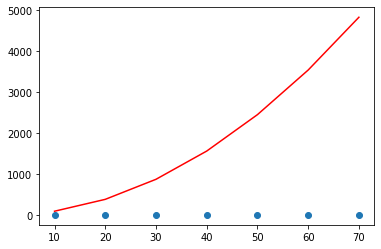

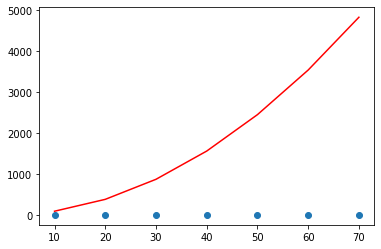

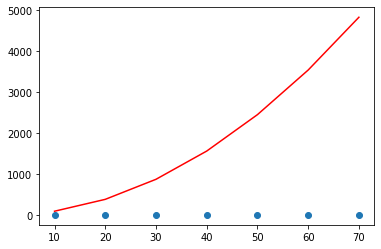

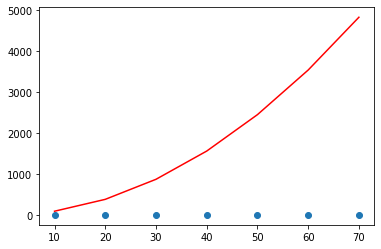

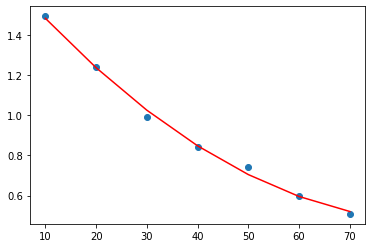

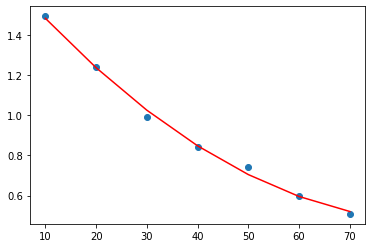

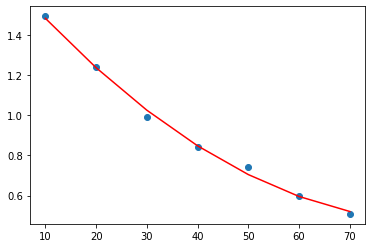

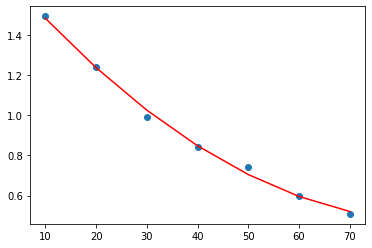

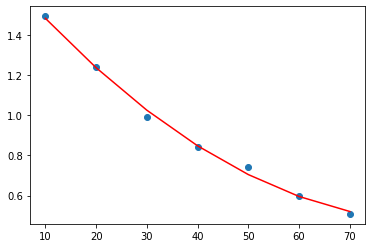

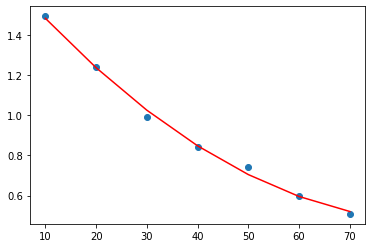

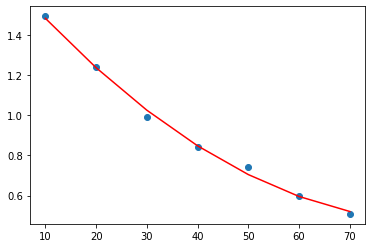

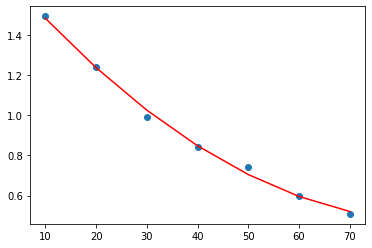

`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 2.2608e+07, final cost 1.3177e-03, first-order optimality 9.09e-13.
parámetros hallados
[1.76228571e+00 2.96976190e-02 1.70952381e-04]
Parámetros hallados (con incertezas):
parametro[0]: 1.762e+00 ± 2.000e-02
parametro[1]: 2.970e-02 ± 1.146e-03
parametro[2]: 1.710e-04 ± 1.400e-05


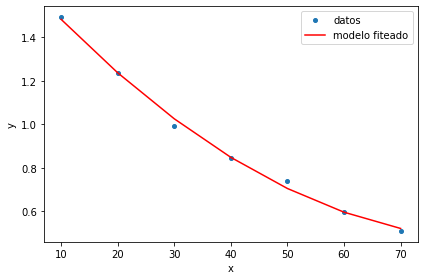

In [6]:
from scipy.optimize import least_squares

def modelo(p,x):
    # p es un vector con los parámetros
    # x es el vector de datos x
    return p[0]-p[1]*x+p[2]*x**2

param_list = []

def residuos(p, x, y):
    # p es un vector con los parámetros
    # x es el vector de datos x
    # y es el vector de datos y
    y_modelo = modelo(p, x)
    plt.clf()
    plt.plot(x,y,'o',x,y_modelo,'r-')
    plt.pause(0.05)
    param_list.append(p)
    return y_modelo - y

parametros_iniciales=[1, 1, 1]  # Ajusta
res = least_squares(residuos, parametros_iniciales, args=(x_datos, y_datos), verbose=1)

# Estos son los parámetros hallados:
print('parámetros hallados')
print(res.x)

# Calculamos la matriz de covarianza "pcov"
def calcular_cov(res,y_datos):
    U, S, V = np.linalg.svd(res.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res.jac.shape) * S[0]
    S = S[S > threshold]
    V = V[:S.size]
    pcov = np.dot(V.T / S**2, V)

    s_sq = 2 * res.cost / (y_datos.size - res.x.size)
    pcov = pcov * s_sq
    return pcov

pcov = calcular_cov(res,y_datos)

# De la matriz de covarinza podemos obtener los valores de desviación estándar
# de los parametros hallados
pstd = np.sqrt(np.diag(pcov))

print('Parámetros hallados (con incertezas):')
for i,param in enumerate(res.x):
    print('parametro[{:d}]: {:5.3e} ± {:5.3e}'.format(i,param,pstd[i]/2))

y_modelo = modelo(res.x, x_datos)

plt.figure()
plt.plot(x_datos, y_datos ,  'o', markersize=4, label='datos')
plt.plot(x_datos, y_modelo, 'r-',               label='modelo fiteado')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.tight_layout()